Connect Google Colab With your Google drive For Data 

In [151]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Import Libraries for view Data


In [152]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

Show Some Data Of noraml xray

In [153]:
normal_xry = cv2.imread('/content/drive/My Drive/chest_xray/train/NORMAL/IM-0117-0001.jpeg')

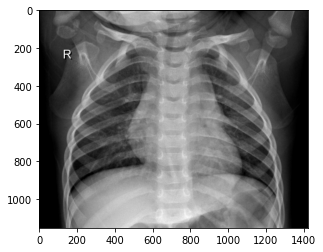

In [154]:
plt.imshow(normal_xry)

In [155]:
normal_xry.shape

(1152, 1422, 3)

In [156]:
normal_xry =  cv2.cvtColor(normal_xry, cv2.COLOR_BGR2RGB)

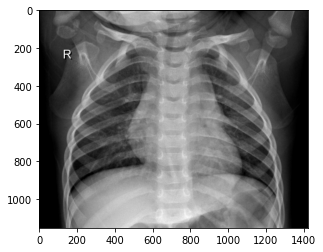

In [157]:
plt.imshow(normal_xry)

Make image Genrator 

In [158]:
from tensorflow.keras.preprocessing.image  import ImageDataGenerator

In [159]:
img_gen = ImageDataGenerator(rotation_range=30, 
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             rescale = 1/255,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip= True,
                             fill_mode='nearest'                             
                             )

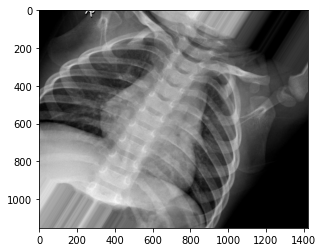

In [160]:
plt.imshow(img_gen.random_transform(normal_xry))

In [161]:
img_gen.flow_from_directory('/content/drive/My Drive/chest_xray/train')

Found 5216 images belonging to 2 classes.


In [162]:
img_gen.flow_from_directory('/content/drive/My Drive/chest_xray/test')

Found 632 images belonging to 2 classes.


In [163]:
inpt_shape = (150, 150, 3)

Import LAyers and model

In [164]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Activation, Dropout, Flatten
from tensorflow.keras.models import Sequential

**Make CNN **

In [174]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),strides=(1,1),input_shape=inpt_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size=(3, 3), input_shape=inpt_shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size=(3, 3),input_shape=inpt_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dense(1, activation='sigmoid'))

Compile Model 

In [175]:
model.compile(loss= 'binary_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [178]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 18496)            

In [179]:
inpt_shape[:2]

(150, 150)

Make testing and traning genrater 

In [180]:
batch_size= 32

train_gen = img_gen.flow_from_directory('/content/drive/My Drive/chest_xray/train',
                                        target_size=inpt_shape[:2],
                                        batch_size= batch_size,
                                        class_mode= 'binary')

Found 5216 images belonging to 2 classes.


In [181]:
test_gen = img_gen.flow_from_directory('/content/drive/My Drive/chest_xray/test',
                                        target_size=inpt_shape[:2],
                                        batch_size= batch_size,
                                        class_mode= 'binary')

Found 632 images belonging to 2 classes.


Show  Model Clases 

In [182]:
train_gen.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

Train Model

In [183]:
result = model.fit_generator(train_gen, steps_per_epoch=100, epochs=50,validation_data=test_gen, validation_steps=13)


Epoch 1/50
100/100 [==============================] - 52s 516ms/step - loss: 0.5605 - accuracy: 0.7434 - val_loss: 0.6190 - val_accuracy: 0.6226
Epoch 2/50
100/100 [==============================] - 52s 516ms/step - loss: 0.4503 - accuracy: 0.7766 - val_loss: 0.5948 - val_accuracy: 0.7115
Epoch 3/50
100/100 [==============================] - 51s 513ms/step - loss: 0.3721 - accuracy: 0.8303 - val_loss: 0.4525 - val_accuracy: 0.8053
Epoch 4/50
100/100 [==============================] - 51s 510ms/step - loss: 0.3028 - accuracy: 0.8625 - val_loss: 0.3585 - val_accuracy: 0.8486
Epoch 5/50
100/100 [==============================] - 52s 517ms/step - loss: 0.3006 - accuracy: 0.8700 - val_loss: 0.5609 - val_accuracy: 0.7740
Epoch 6/50
100/100 [==============================] - 51s 508ms/step - loss: 0.2882 - accuracy: 0.8744 - val_loss: 0.4128 - val_accuracy: 0.8173
Epoch 7/50
100/100 [==============================] - 51s 506ms/step - loss: 0.2674 - accuracy: 0.8913 - val_loss: 0.4214 - val_ac

In [184]:
print(result.history['accuracy'])

[0.7434375286102295, 0.776562511920929, 0.8303124904632568, 0.862500011920929, 0.8700000047683716, 0.8743749856948853, 0.8912500143051147, 0.8868749737739563, 0.8893749713897705, 0.9068750143051147, 0.8968750238418579, 0.9084374904632568, 0.9078124761581421, 0.9137499928474426, 0.9084374904632568, 0.9209374785423279, 0.9281250238418579, 0.9190624952316284, 0.9284374713897705, 0.9168750047683716, 0.9271875023841858, 0.9290624856948853, 0.9234374761581421, 0.9331250190734863, 0.9303125143051147, 0.9312499761581421, 0.9362499713897705, 0.9371874928474426, 0.9415624737739563, 0.9403125047683716, 0.9353125095367432, 0.9434375166893005, 0.9437500238418579, 0.9381250143051147, 0.9459375143051147, 0.9446874856948853, 0.9412500262260437, 0.9375, 0.9490625262260437, 0.9471874833106995, 0.9437500238418579, 0.9449999928474426, 0.9481250047683716, 0.9512500166893005, 0.948437511920929, 0.9434375166893005, 0.9390624761581421, 0.9518749713897705, 0.9490625262260437, 0.9537500143051147]


In [185]:
print(result.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


Draw Graph B/W  traning accuracy and testing accuracy

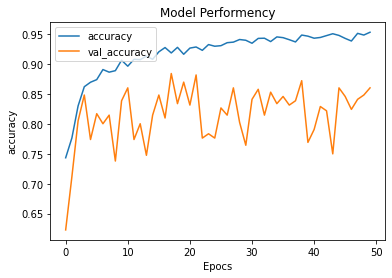

In [186]:
plt.plot(result.history['accuracy'])
plt.plot(result.history['val_accuracy'])
plt.title('Model Performency')
plt.ylabel('accuracy')
plt.xlabel('Epocs')
plt.legend(['accuracy', 'val_accuracy'], loc='upper left')
plt.show()

Predict some Data 

In [187]:
from tensorflow.keras.preprocessing import image
import numpy as np

In [188]:
normal_xry = image.load_img('/content/drive/My Drive/chest_xray/check/NORMAL2-IM-1436-0001.jpeg', target_size= (150, 150))
normal_xry = image.img_to_array(normal_xry)
normal_xry = np.expand_dims(normal_xry, axis=0)
normal_xry = normal_xry/255
print(normal_xry.shape)

(1, 150, 150, 3)


In [189]:
prediction = model.predict(normal_xry)

In [190]:
print(f'probabiliti of normal xray report is:{prediction}')

probabiliti of normal xray report is:[[0.25146624]]


In [191]:
classes = model.predict_classes(normal_xry)
print(classes)

[[0]]


Save Model

In [192]:
model.save('Chest_Xray_Pneumonia.h5')